In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
news_df = pd.read_csv('../data/raw_analyst_ratings.csv')

In [19]:

# Convert 'date' column to datetime and set timezone to 'America/New_York'
news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce' ,  utc=True).dt.tz_convert('America/New_York')

## Basic Infromation

In [15]:
print("Dataset Info:")
print(news_df.info())
print("\nFirst 5 Rows:")
print(news_df.head())
print("\nMissing Values:")
print(news_df.isnull().sum())
print("\nUnique Values:")
print(f"Stocks: {news_df['stock'].nunique()}")
print(f"Publishers: {news_df['publisher'].nunique()}")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   Unnamed: 0  1407328 non-null  int64         
 1   headline    1407328 non-null  object        
 2   url         1407328 non-null  object        
 3   publisher   1407328 non-null  object        
 4   date        55987 non-null    datetime64[ns]
 5   stock       1407328 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 64.4+ MB
None

First 5 Rows:
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains N

## Analyze the distribution of headline lengths in characters and words.

In [6]:
news_df['headline_length_chars'] = news_df['headline'].str.len()
news_df['headline_length_words'] = news_df['headline'].str.split().str.len()

In [7]:
# Descriptive statistics
print("Headline Length (Characters):")
print(news_df['headline_length_chars'].describe())
print("\nHeadline Length (Words):")
print(news_df['headline_length_words'].describe())

Headline Length (Characters):
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length_chars, dtype: float64

Headline Length (Words):
count    1.407328e+06
mean     1.141671e+01
std      6.352997e+00
min      1.000000e+00
25%      7.000000e+00
50%      1.000000e+01
75%      1.300000e+01
max      7.700000e+01
Name: headline_length_words, dtype: float64


## Visualize distribution of headline lengths (characters)

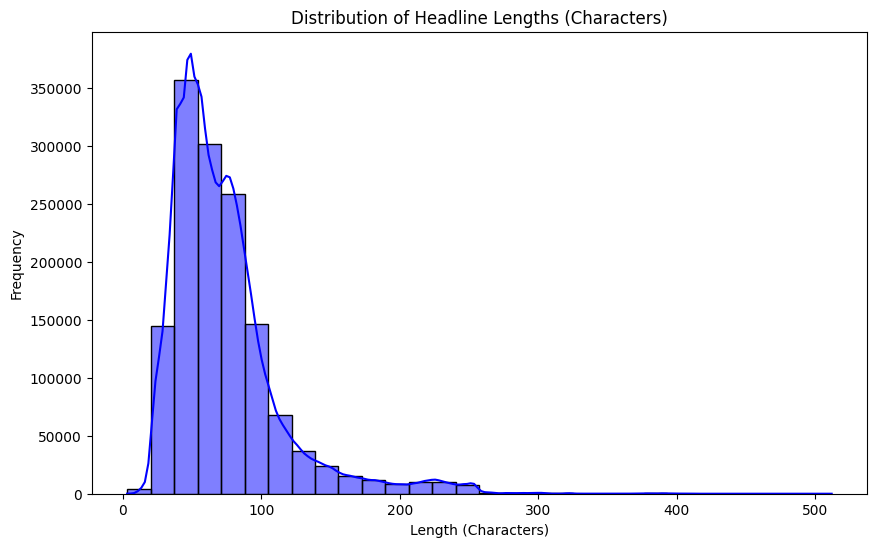

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(news_df['headline_length_chars'], bins=30, kde=True, color='blue')
plt.title('Distribution of Headline Lengths (Characters)')
plt.xlabel('Length (Characters)')
plt.ylabel('Frequency')
plt.savefig('images/headline_length_chars.png')
plt.show()

## Visualize distribution of headline lengths (words)

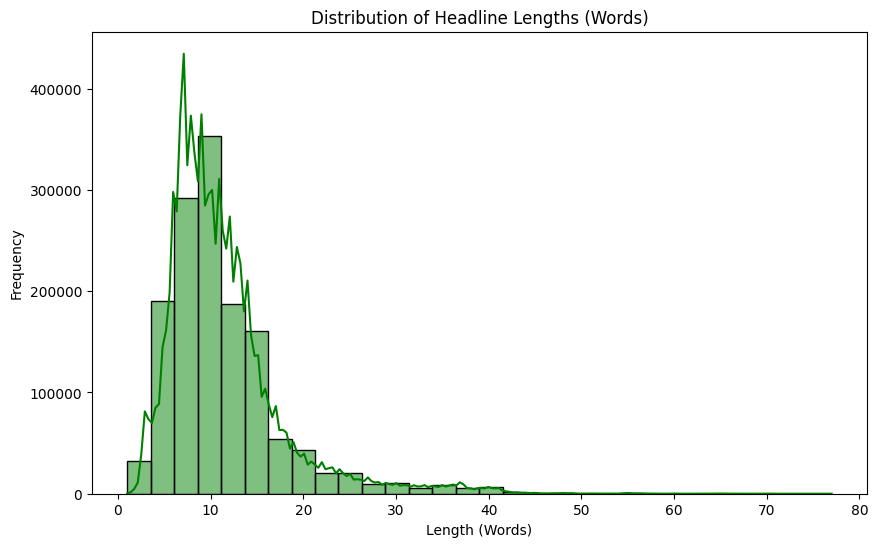

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(news_df['headline_length_words'], bins=30, kde=True, color='green')
plt.title('Distribution of Headline Lengths (Words)')
plt.xlabel('Length (Words)')
plt.ylabel('Frequency')
plt.savefig('images/headline_length_words.png')
plt.show()

## Count articles per publisher

In [14]:
publisher_counts = news_df['publisher'].value_counts()

In [16]:
print("Top 10 Publishers by Article Count:")
print(publisher_counts.head(10))

Top 10 Publishers by Article Count:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


In [17]:
print("last 10 Publishers by Article Count:")
print(publisher_counts.tail(10))

last 10 Publishers by Article Count:
publisher
GeoInvesting      1
Tom Kee           1
Greg W. Harmon    1
TradingPub        1
Ethan Joseph      1
Matthew Ely       1
Frank Ochoa       1
Jeremie Capron    1
Marvin Dumont     1
Igor Gonta        1
Name: count, dtype: int64


## Visualize top publishers

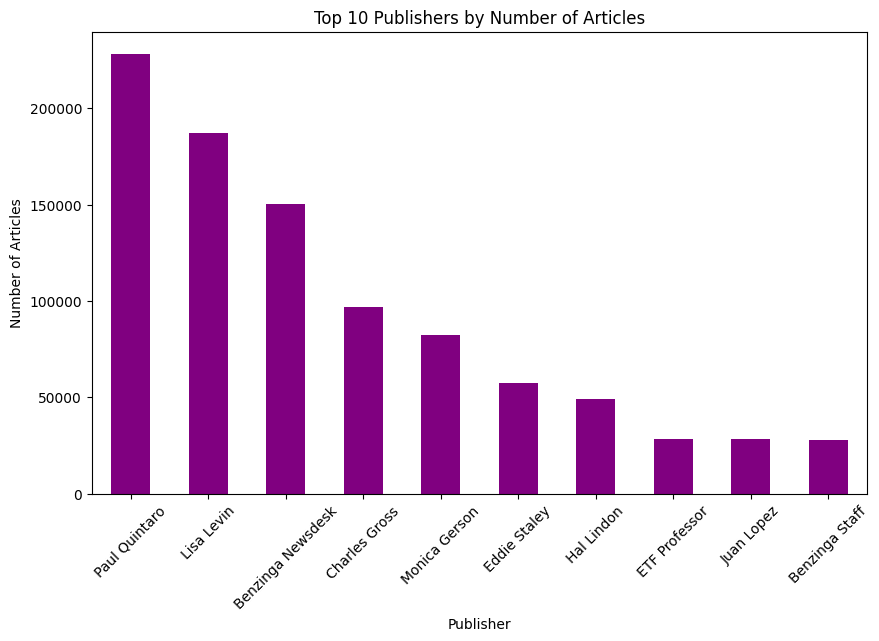

In [ ]:
plt.figure(figsize=(10, 6))
publisher_counts.head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Publishers by Number of Articles')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.savefig('images/top_publishers.png')
plt.show()

# Visualize top least 10 publishers

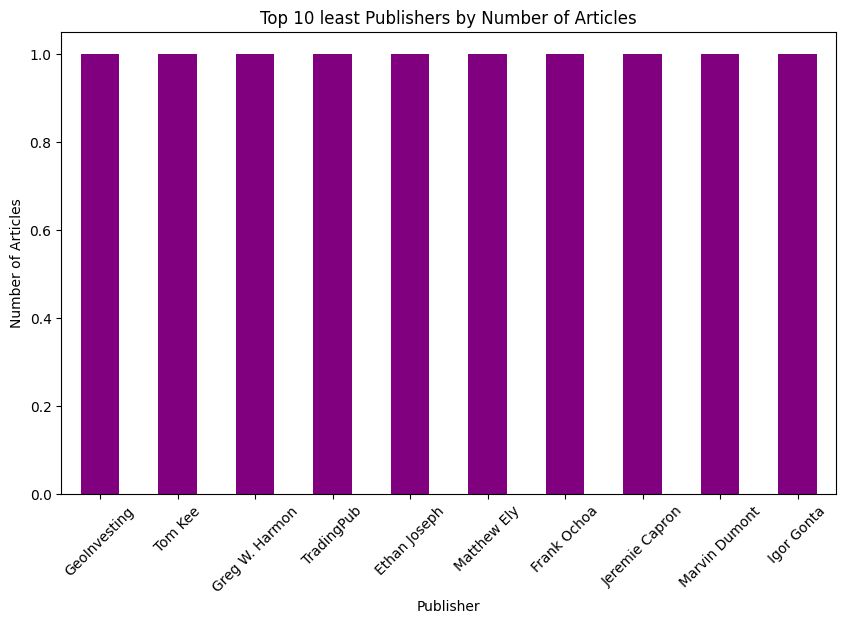

In [28]:
plt.figure(figsize=(10, 6))
publisher_counts.tail(10).plot(kind='bar', color='purple')
plt.title('Top 10 least Publishers by Number of Articles')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.savefig('images/least_publishers.png')
plt.show()

## Analyze publication frequency over years and by weekday.

In [20]:
news_df['year'] = news_df['date'].dt.year
news_df['weekday'] = news_df['date'].dt.day_name()

## Articles per year

In [21]:
articles_per_year = news_df['year'].value_counts().sort_index()
print("Articles per Year:")
print(articles_per_year)

Articles per Year:
year
2011.0      760
2012.0     1187
2013.0     1240
2014.0     1189
2015.0     3695
2016.0     4223
2017.0     3581
2018.0     5395
2019.0     6325
2020.0    28392
Name: count, dtype: int64


## Visualize articles over time

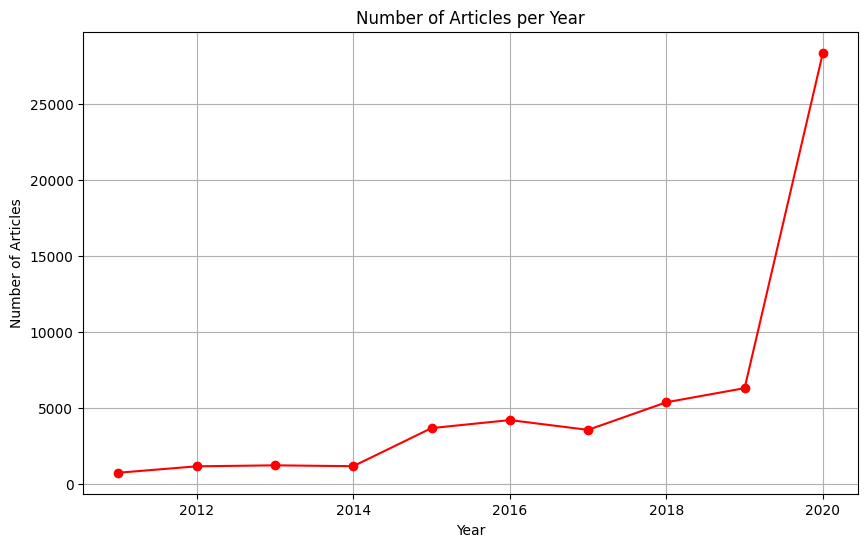

In [32]:
plt.figure(figsize=(10, 6))
articles_per_year.plot(kind='line', marker='o', color='red')
plt.title('Number of Articles per Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.savefig('images/articles_per_year.png')
plt.show()

## Articles by weekday

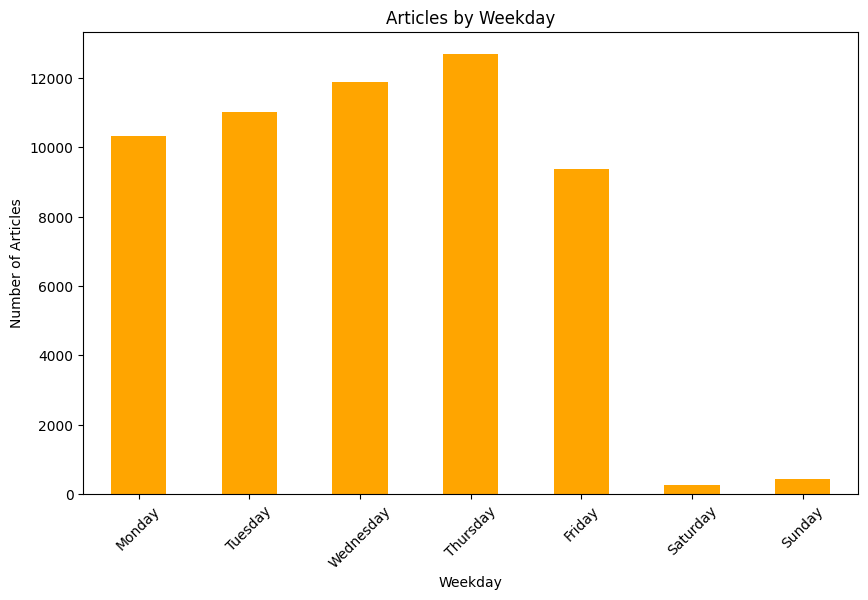

In [22]:
weekday_counts = news_df['weekday'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
plt.figure(figsize=(10, 6))
weekday_counts.plot(kind='bar', color='orange')
plt.title('Articles by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.savefig('images/articles_by_weekday.png')
plt.show()

## Analyze publication frequency over time and by hour of day.

# Examine article frequency over time for a specific stock

In [37]:
print(news_df['stock'].unique().tolist())

['A', 'AA', 'AAC', 'AADR', 'AAL', 'AAMC', 'AAME', 'AAN', 'AAOI', 'AAON', 'AAP', 'AAPL', 'AAU', 'AAV', 'AAVL', 'AAWW', 'AAXJ', 'AB', 'ABAC', 'ABAX', 'ABB', 'ABBV', 'ABC', 'ABCB', 'ABCD', 'ABCO', 'ABCW', 'ABDC', 'ABEV', 'ABG', 'ABGB', 'ABIO', 'ABM', 'ABMD', 'ABR', 'ABTL', 'ABX', 'ABY', 'ACAD', 'ACAS', 'ACAT', 'ACC', 'ACCO', 'ACCU', 'ACE', 'ACET', 'ACFC', 'ACFN', 'ACG', 'ACGL', 'ACH', 'ACHC', 'ACHN', 'ACIW', 'ACLS', 'ACM', 'ACMP', 'ACN', 'ACNB', 'ACOR', 'ACP', 'ACPW', 'ACRE', 'ACRX', 'ACSF', 'ACST', 'ACT', 'ACTA', 'ACTG', 'ACTS', 'ACU', 'ACUR', 'ACWI', 'ACWV', 'ACWX', 'ACXM', 'ACY', 'ADAT', 'ADBE', 'ADC', 'ADEP', 'ADES', 'ADGE', 'ADHD', 'ADI', 'ADK', 'ADM', 'ADMA', 'ADMP', 'ADMS', 'ADNC', 'ADP', 'ADPT', 'ADRA', 'ADRD', 'ADRE', 'ADRU', 'ADS', 'ADSK', 'ADT', 'ADTN', 'ADVS', 'ADX', 'ADXS', 'ADZ', 'AE', 'AEB', 'AEC', 'AEE', 'AEG', 'AEGN', 'AEGR', 'AEHR', 'AEIS', 'AEL', 'AEM', 'AEO', 'AEPI', 'AER', 'AERI', 'AES', 'AET', 'AETI', 'AEY', 'AEZS', 'AF', 'AFA', 'AFAM', 'AFB', 'AFC', 'AFCB', 'AFFX', 

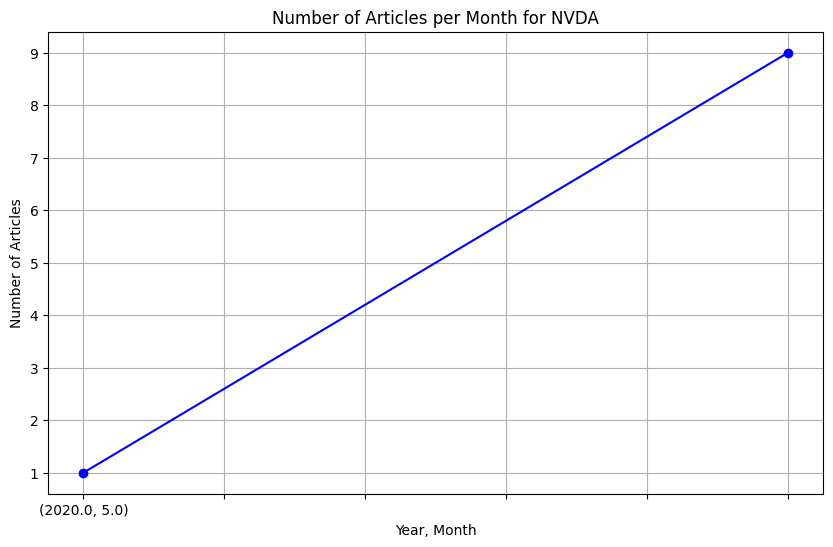

In [26]:
stock = 'NVDA'  # Example stock symbol
stock_df = news_df[news_df['stock'] == stock]
articles_per_month = stock_df.groupby([stock_df['date'].dt.year, stock_df['date'].dt.month]).size()

# Visualize
plt.figure(figsize=(10, 6))
articles_per_month.plot(kind='line', marker='o', color='blue')
plt.title(f'Number of Articles per Month for {stock}')
plt.xlabel('Year, Month')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.savefig(f'images/articles_per_month_{stock}.png')
plt.show()

## Analyze publication frequency by hour of day.

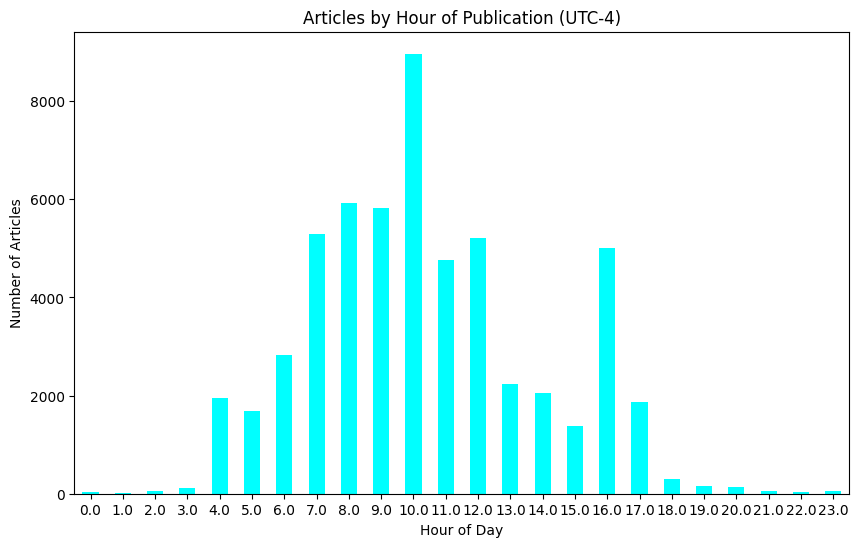

In [ ]:
news_df['hour'] = news_df['date'].dt.hour

hourly_counts = news_df['hour'].value_counts().sort_index()

# Visualize
plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar', color='cyan')
plt.title('Articles by Hour of Publication (UTC-4)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)
plt.savefig('images/articles_per_hour.png')
plt.show()

## Analyze publisher contributions and check for organizational patterns

In [28]:
def extract_domain(publisher):
    if '@' in publisher:
        return publisher.split('@')[1]
    return publisher

# Extract domains
news_df['publisher_domain'] = news_df['publisher'].apply(extract_domain)
domain_counts = news_df['publisher_domain'].value_counts()

## Display top domains

In [29]:
print("Top 10 Publisher Domains:")
print(domain_counts.head(10))

Top 10 Publisher Domains:
publisher_domain
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


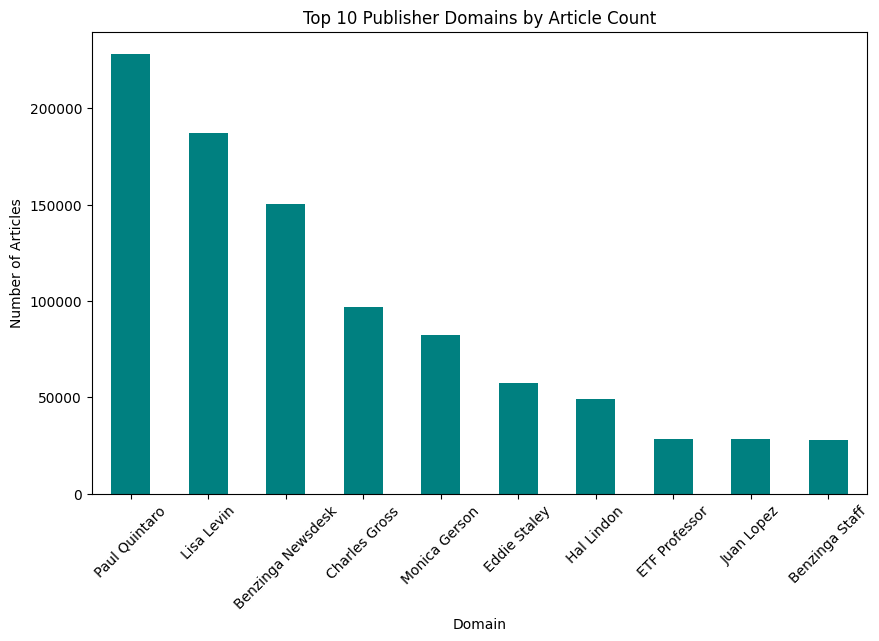

In [30]:
plt.figure(figsize=(10, 6))
domain_counts.head(10).plot(kind='bar', color='teal')
plt.title('Top 10 Publisher Domains by Article Count')
plt.xlabel('Domain')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.savefig('images/top_domains.png')
plt.show()

## Check if publishers focus on specific stocks.

In [36]:
publisher_stock = pd.crosstab(news_df['publisher_domain'], news_df['stock'])

In [52]:
#Display top publishers for a specific stock
stock = 'AAPL'  # Example stock symbol
print(f"Top Publishers for {stock}:")
top_publishers = publisher_stock[stock].sort_values(ascending=False).head(10)

Top Publishers for AAPL:


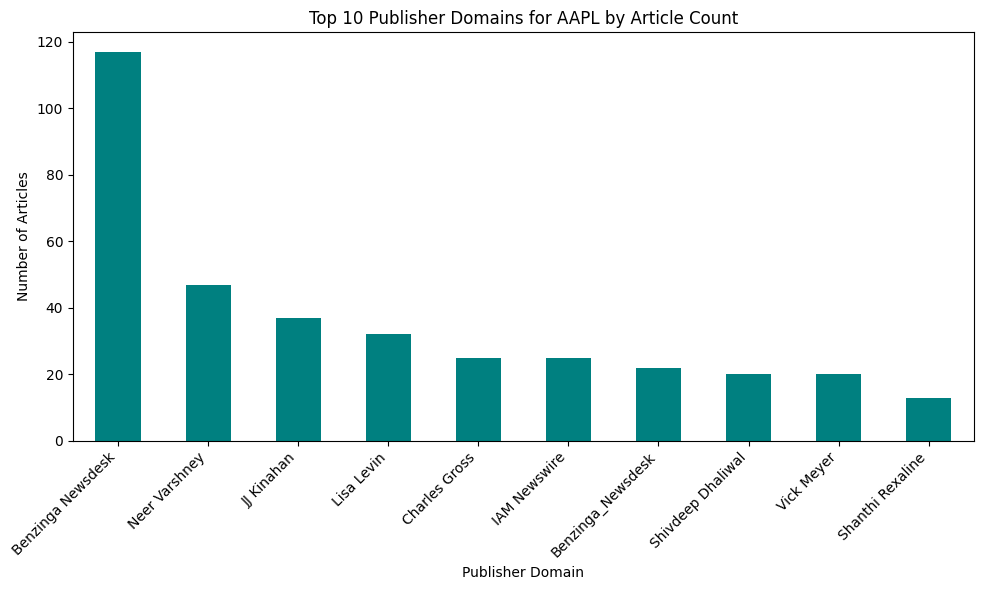

In [53]:
plt.figure(figsize=(10, 6))
top_publishers.plot(kind='bar', color='teal')
plt.title(f'Top 10 Publisher Domains for {stock} by Article Count')
plt.xlabel('Publisher Domain')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(f'images/top_publishers_{stock}.png')
plt.show()

In [44]:
# Save summary statistics
with open('../data/summary/eda_summary.txt', 'w') as f:
    f.write("Headline Length (Characters):\n")
    f.write(str(news_df['headline_length_chars'].describe()) + "\n\n")
    f.write("Headline Length (Words):\n")
    f.write(str(news_df['headline_length_words'].describe()) + "\n\n")
    f.write("Top 10 Publishers:\n")
    f.write(str(publisher_counts.head(10)) + "\n\n")
    f.write("Top 10 Publisher Domains:\n")
    f.write(str(domain_counts.head(10)) + "\n")